### Homework 06 Anya Sharma

### Question 1:
The Simple Linear Regression model describes a relationship between a predictor variable X and an outcome variable Y. It assumes that Y can be predicted as a linear function of X with some added random error. The model equation is Y= B0 + B1 X + e. Here, B0 is the intercept, or the expected value of Y when X =0, and B1 is the slope, representing the expected change in Y for a one-unit increase in X. 

The error term  E accounts for random variation or noise around this linear relationship, assumed to follow a normal distribution with mean zero and standard deviation sigma. This formulation implies that for any fixed value of X, the outcome Y is normally distributed with mean B0 + B1X and variance sigma^2.


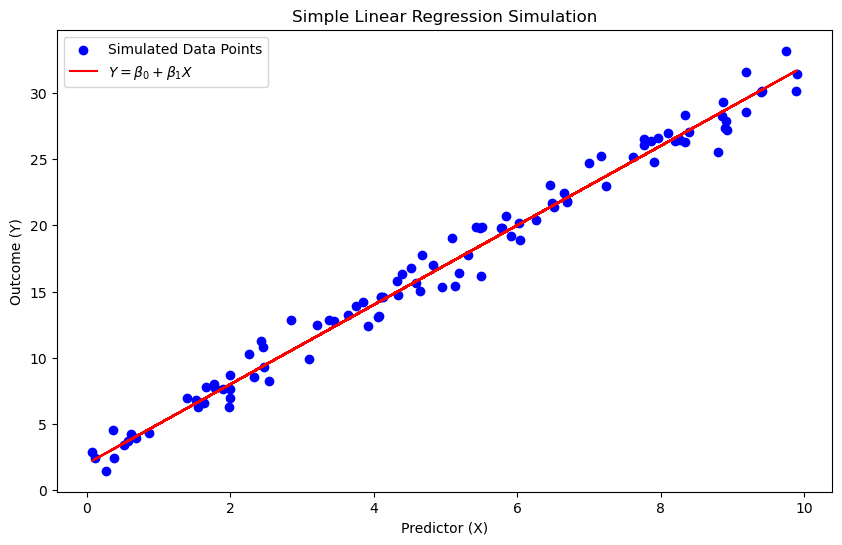

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform

# Parameters for the model
n = 100             # Number of data points
beta0 = 2           # Intercept
beta1 = 3           # Slope
sigma = 1           # Standard deviation of the error term

# Generate predictor variable X from a uniform distribution
x = uniform.rvs(0, 10, size=n)  # X values range from 0 to 10

# Generate errors from a normal distribution
errors = norm.rvs(0, sigma, size=n)

# Compute the outcome variable Y using the simple linear model equation
y = beta0 + beta1 * x + errors

# Plot the data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Simulated Data Points')
plt.plot(x, beta0 + beta1 * x, color='red', label=r'$Y = \beta_0 + \beta_1 X$')
plt.xlabel('Predictor (X)')
plt.ylabel('Outcome (Y)')
plt.title('Simple Linear Regression Simulation')
plt.legend()
plt.show()


### Question 2:

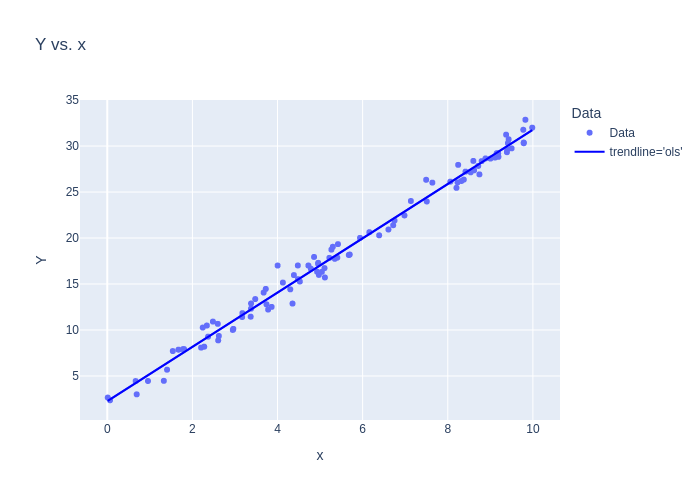

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf  # This library is for creating and fitting statistical models, especially for regression analysis.
import plotly.express as px  # This is a plotting library that allows for interactive visualizations.

# Step 1: Simulate data using a Simple Linear Regression model
n = 100
beta0 = 2
beta1 = 3
sigma = 1

x = np.random.uniform(0, 10, size=n)  # Predictor variable X sampled from a uniform distribution
errors = np.random.normal(0, sigma, size=n)  # Errors sampled from a normal distribution
y = beta0 + beta1 * x + errors  # Outcome variable Y computed from the regression model

# Combine into a pandas DataFrame
df = pd.DataFrame({'x': x, 'Y': y})  # Create a DataFrame with the simulated data

# Step 2: Fit the Simple Linear Regression model
# The following two steps specify and fit the regression model:
model_data_specification = smf.ols("Y ~ x", data=df)  # This line specifies the linear model "Y as a function of x".
fitted_model = model_data_specification.fit()  # This fits the model to the data, estimating coefficients.

# Step 3: Explore the fitted model summary statistics
fitted_model.summary()  # Provides a comprehensive summary of the model, including parameter estimates and significance tests.
fitted_model.summary().tables[1]  # Provides a specific table with the estimated model coefficients, standard errors, and confidence intervals.
fitted_model.params  # Returns the estimated parameters (intercept and slope).
fitted_model.params.values  # Returns just the values of the estimated parameters, without the parameter names.
fitted_model.rsquared  # Returns the R-squared value, which indicates the proportion of variance in Y explained by X.

# Step 4: Visualize the fitted model with Plotly
df['Data'] = 'Data'  # Hack to add data to legend
fig = px.scatter(df, x='x', y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')

# Adding the trendline manually:
# This step adds a fitted trendline to the scatter plot, simulating the 'trendline="ols"' functionality:
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

fig.show(renderer="png")  # Use "renderer='png'" for GitHub/MarkUs submissions


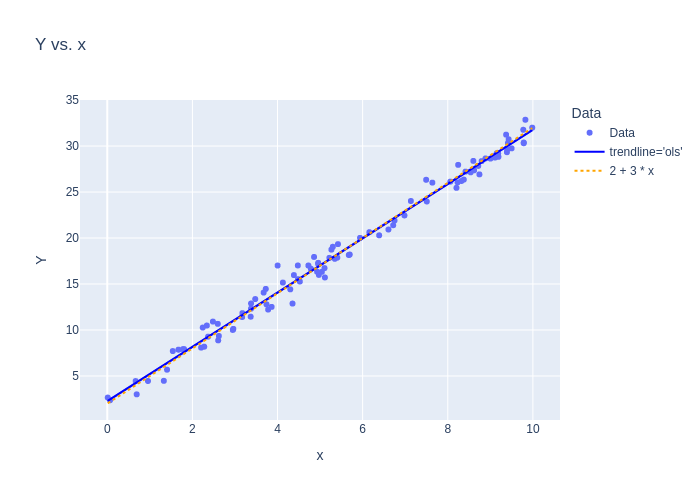

In [5]:
# what does this add onto the figure in constrast to `trendline='ols'`?
x_range = np.array([df['x'].min(), df['x'].max()])
# beta0 and beta1 are assumed to be defined
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

# Question 3 : 

The two lines on this plot represent different interpretations of the relationship between the predictor \( x \) and the response variable.

1. **The Fitted Regression Line**: This line is calculated based on the sample data and shows the estimated relationship between \( x \) and \( y \) derived from the specific data points in the dataset. Because it’s estimated from this one sample, it reflects the particular characteristics and random sampling variation in the observed data. Essentially, it’s a reflection of the trend in this sample, which may vary if a different sample were drawn from the population.

2. **The Theoretical Line**: This line represents the true relationship between \( x \) and \( y \) based on the known values of \(\beta_0\) and \(\beta_1\). It’s not influenced by sampling variation and instead reflects the underlying relationship as specified in the theoretical model. This line shows what the "true" trend would be in a perfect scenario without sampling variation.

In short, the fitted regression line shows the relationship in the observed sample, potentially influenced by random sampling variations, while the theoretical line is the ideal relationship in the absence of sampling variation. Comparing these lines helps illustrate how close the sample-based estimate is to the true model.

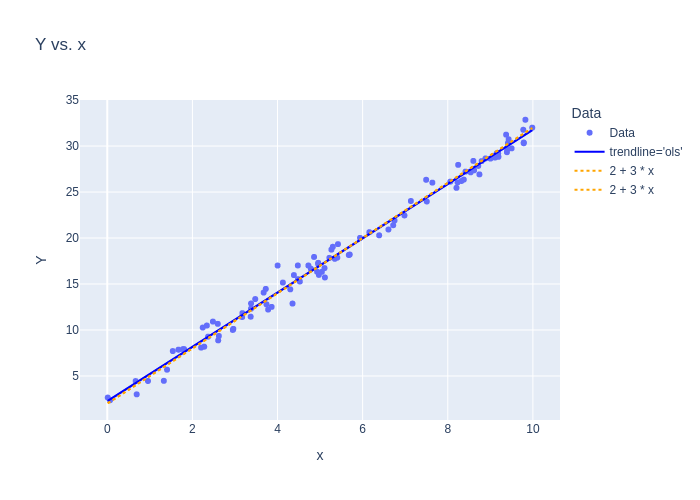

In [6]:
# Define the range of x for plotting the true line
x_range = np.array([df['x'].min(), df['x'].max()])

# Calculate the y values for the theoretical line using the true values of beta0 and beta1
y_line = beta0 + beta1 * x_range

# Add the theoretical regression line to the plot
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0) + ' + ' + str(beta1) + ' * x', 
                line=dict(dash='dot', color='orange'))

fig.show(renderer="png")  # Use "renderer='png'" for GitHub/MarkUs submissions


# Question 4:
The fitted values in `fitted_model.fittedvalues` are derived from the estimated parameters of the regression model. These parameters, accessible through `fitted_model.params`, include the intercept, often referred to as beta zero, and the slope, often referred to as beta one, calculated based on the data. Using these estimates, each fitted value, represented as Y hat, is computed as Y hat equals beta zero hat plus beta one hat times X, where X represents each observed predictor value. Thus, `fitted_model.fittedvalues` contains the predicted Y values for each X based on the estimated line that best fits the data.

## Question 5:
The line chosen for the fitted model using the "ordinary least squares" (OLS) method is the one that minimizes the sum of the squared differences between the observed values of \( Y \) (the actual data points) and the predicted values \( \hat{Y} \) (the values on the regression line). These differences are known as **residuals**.

The reason "squares" are used in this method is to avoid the cancellation of positive and negative residuals when they are summed. Squaring the residuals makes all differences positive and emphasizes larger discrepancies. By minimizing the sum of the squared residuals, OLS ensures that the line best fits the data by balancing the overall distance between the observed points and the regression line.

In the visualization, the **residuals** are the vertical red dashed lines representing the distance between each observed data point and the fitted line. This demonstrates the residuals, which reflect the prediction errors that arise from sampling variability and noise in the data. The fitted line minimizes these squared residuals, ensuring the best fit based on the observed data.

## Question 6:
The first expression calculates the proportion of the variation in Y explained by the regression model. It does this by comparing the total variation in Y (the denominator) with the unexplained variation (the numerator, which is the sum of squared residuals). The result shows how well the model captures the variability in Y.

`fitted_model.rsquared` represents this same proportion, indicating how much of the variation in Y is explained by the model. A higher R-squared means the model fits the data better, while a lower value means the model explains less of the variation.

The two `np.corrcoef(...)[0,1]**2` expressions measure the strength of the linear relationship between the variables. The first captures how much of the variation in Y is explained by the fitted values, equivalent to R-squared. The second measures the proportion of variation in Y explained by X, showing the strength of the relationship between the predictor and outcome.
## Question 7:

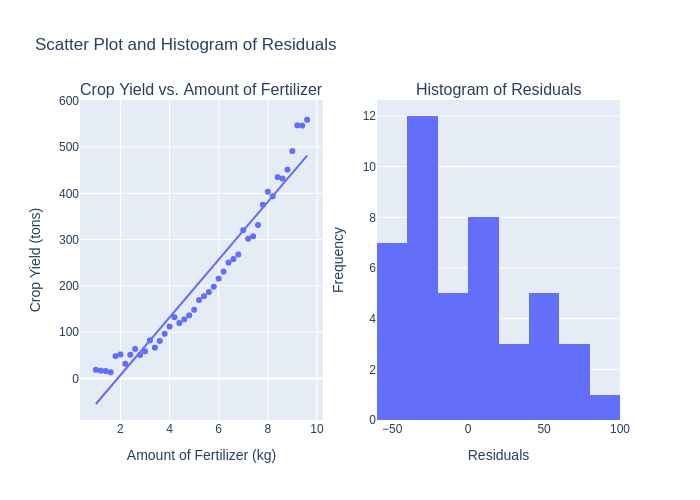

In [7]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The **Simple Linear Regression** model makes several key assumptions. Here are two that may not seem fully compatible with the example data provided:

1. **Linearity**: The model assumes a **linear** relationship between the predictor (Amount of Fertilizer) and the outcome (Crop Yield). However, the data shown in the scatter plot suggests a potential **non-linear relationship**, especially in the earlier and later parts of the data where the growth in crop yield seems to slow down at higher levels of fertilizer. This would violate the assumption of linearity, indicating that a more complex model might be required.

2. **Constant Variance of Errors (Homoscedasticity)**: The model assumes that the residuals (errors) have constant variance across all levels of the predictor. When you observe the histogram of residuals, if the variance of residuals appears to increase as the predictor variable increases (which could show a funnel shape), this would indicate **heteroscedasticity**. This would violate the assumption of homoscedasticity, suggesting that the model's predictions may not be as reliable at higher values of fertilizer usage.

These violations would affect the accuracy and reliability of the Simple Linear Regression model's estimates and predictions.


# Chat log:
Here is a summary of our conversation:

Simple Linear Regression Model Explanation: We discussed the theoretical components of a Simple Linear Regression model, including the predictor and outcome variables, slope, intercept coefficients, error terms, and how they combine to form a sample from a normal distribution.
Python Demonstration of SLR: We demonstrated a Simple Linear Regression model in Python using numpy, scipy.stats, pandas, statsmodels, and plotly.express. We also visualized the theoretical model and compared it with the fitted model's predictions.
Explaining R-squared: We discussed R-squared as a measure of the proportion of variation in the outcome variable explained by the regression model and explained how it relates to the correlation between the observed and predicted values.
Assumptions of Simple Linear Regression: We reviewed some key assumptions of the Simple Linear Regression model and identified two assumptions that do not seem fully compatible with the example data (linearity and homoscedasticity).

https://chatgpt.com/share/672d1636-2b74-8002-92ac-d53bbee067c0

Our interaction focused on understanding the difference between two types of regression lines and how they illustrate statistical concepts like sampling variation:

1. **Explanation of Lines**: We discussed the difference between a fitted regression line (based on sample data and influenced by sampling variation) and a theoretical line (representing the true relationship without sample-specific fluctuations).

2. **Statistical Insight**: The interaction emphasized how comparing these lines can help show how well a sample-based estimate aligns with an ideal model, illustrating the effects of random sampling variation.

3. **Code and Visualization**: Through code examples, we examined how to visualize these lines and interpret their meaning in relation to the underlying statistical model, with practical insights for presenting findings clearly.

This interaction helped clarify key statistical ideas and demonstrated techniques for effective data analysis and visualization.
https://chatgpt.com/share/672d5698-c5a0-8002-891d-84308d970360

# Homework pt. 2:



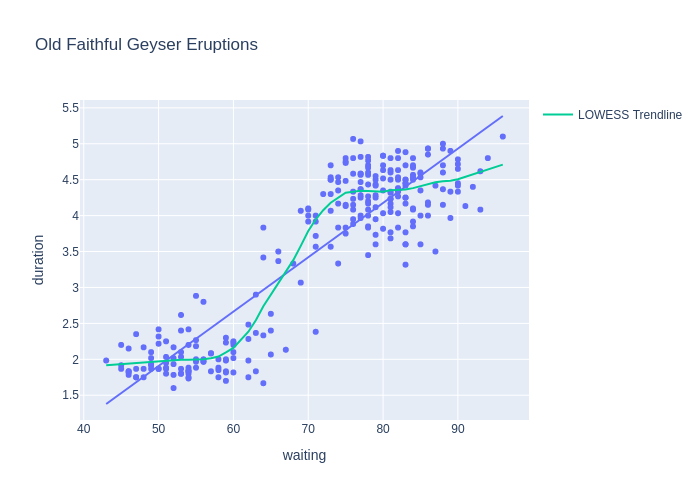

In [8]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png")

In [9]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        02:45:55   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Question 8:
Null hypothesis (H0): No linear association, B1 = 0

Since the p-value of waiting is very small (less then 0.001), we can reject the null hypothesis since there is very strong evidence against the null hypothesis.  

## Question 9:
As seen through the following three simuations of the code there are these three p-values seen when wait time is 62, 64 or 68 minutes being 0.238, 0.036 and <0.001 respectively. 
Therefore there is no evidence to reject the null hypothesis at 62 wait times less then 62 minutes, moderate evidence against the null hypothesis at time less then 64 minutes and very strong evidence against the null hypothesis at time less then 68 minutes. 



                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


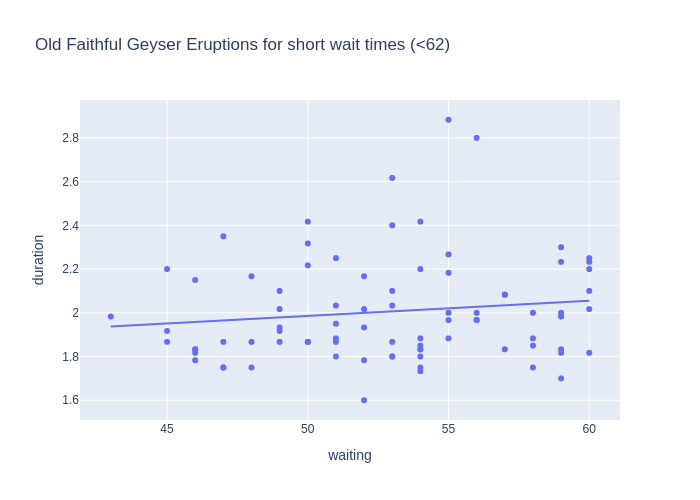

In [10]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


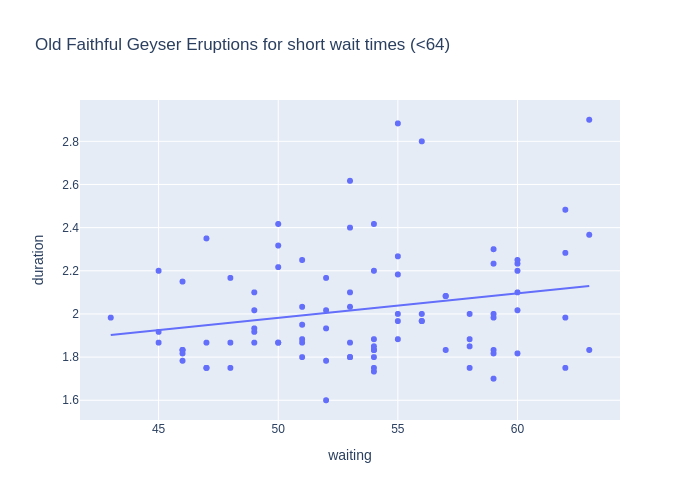

In [11]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


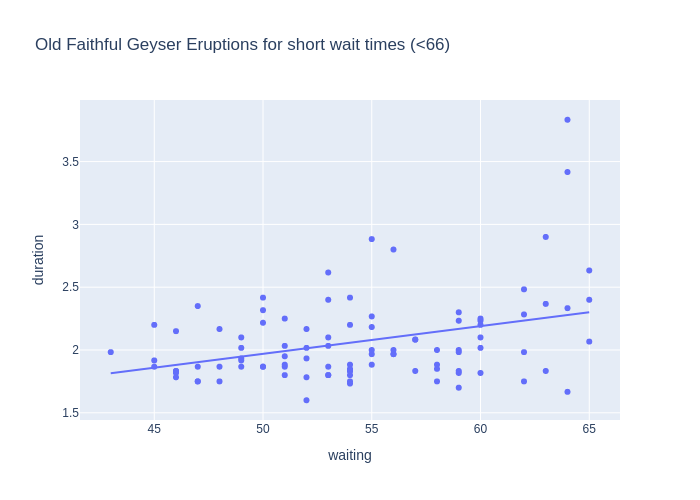

In [12]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

## Question 10:

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


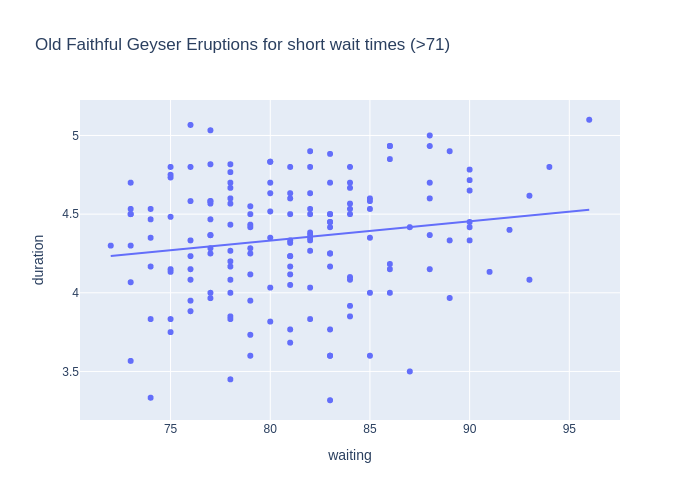

In [13]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### Question 10:

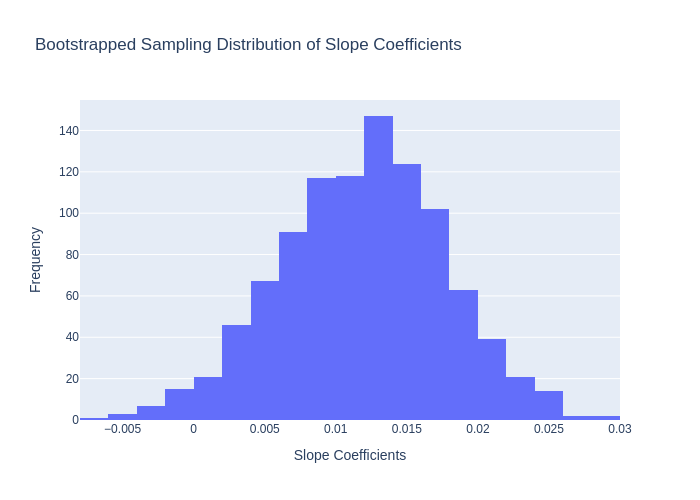

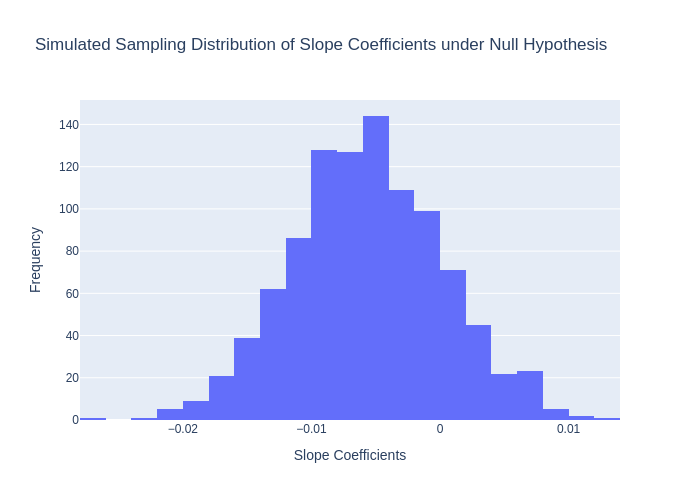

Bootstrapped 95% Confidence Interval for Slope Coefficient: [-0.00030835  0.02315469]
Observed Slope Coefficient: 0.012244029446523483
Simulated p-value under the Null Hypothesis: 0.133
The observed slope is within the 95% bootstrapped confidence interval.


In [14]:
import plotly.express as px
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
from scipy import stats

# The "Classic" Old Faithful Geyser dataset
import seaborn as sns
old_faithful = sns.load_dataset('geyser')

# Define the long wait times dataset
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

# Bootstrap sampling process (n=160)
n = 160
bootstrap_samples = 1000  # Number of bootstrap samples
bootstrapped_slope_coefficients = []

# Create bootstrap samples and fit Simple Linear Regression models
for _ in range(bootstrap_samples):
    bootstrap_sample = old_faithful[long_wait].sample(n=n, replace=True)  # Generate bootstrap sample
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()  # Fit model
    bootstrapped_slope_coefficients.append(model.params.iloc[1])  # Append slope coefficient

# Convert list to numpy array for analysis
bootstrapped_slope_coefficients = np.array(bootstrapped_slope_coefficients)

# 95% Bootstrapped Confidence Interval
bootstrapped_confidence_interval = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])

# Visualize the distribution of bootstrapped slope coefficients
fig1 = px.histogram(
    x=bootstrapped_slope_coefficients, 
    nbins=30, 
    title="Bootstrapped Sampling Distribution of Slope Coefficients",
    labels={'x': 'Slope Coefficients'}
)
fig1.update_layout(xaxis_title="Slope Coefficients", yaxis_title="Frequency")
fig1.show(renderer="png")

# Simulate data under the null hypothesis of no linear association
old_faithful_simulation = old_faithful[long_wait].copy()
old_faithful_simulation['duration'] = 1.65 + 0 * old_faithful_simulation.waiting + stats.norm(loc=0, scale=0.37).rvs(size=long_wait.sum())

# Simulate slope coefficients under the null hypothesis
simulated_slope_coefficients = []

for _ in range(bootstrap_samples):
    bootstrap_sample_simulation = old_faithful_simulation.sample(n=n, replace=True)
    model_simulation = smf.ols('duration ~ waiting', data=bootstrap_sample_simulation).fit()
    simulated_slope_coefficients.append(model_simulation.params.iloc[1])

# Convert list to numpy array for analysis
simulated_slope_coefficients = np.array(simulated_slope_coefficients)

# Calculate the p-value for the observed slope under the null hypothesis
observed_slope = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().params.iloc[1]
simulated_p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()

# Visualize the distribution of simulated slope coefficients
fig2 = px.histogram(
    x=simulated_slope_coefficients, 
    nbins=30, 
    title="Simulated Sampling Distribution of Slope Coefficients under Null Hypothesis",
    labels={'x': 'Slope Coefficients'}
)
fig2.update_layout(xaxis_title="Slope Coefficients", yaxis_title="Frequency")
fig2.show(renderer="png")

# Print results
print(f"Bootstrapped 95% Confidence Interval for Slope Coefficient: {bootstrapped_confidence_interval}")
print(f"Observed Slope Coefficient: {observed_slope}")
print(f"Simulated p-value under the Null Hypothesis: {simulated_p_value}")

# Check if the observed slope is contained within the 95% bootstrapped confidence interval
if bootstrapped_confidence_interval[0] <= observed_slope <= bootstrapped_confidence_interval[1]:
    print("The observed slope is within the 95% bootstrapped confidence interval.")
else:
    print("The observed slope is NOT within the 95% bootstrapped confidence interval.")


# Question 11: 

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


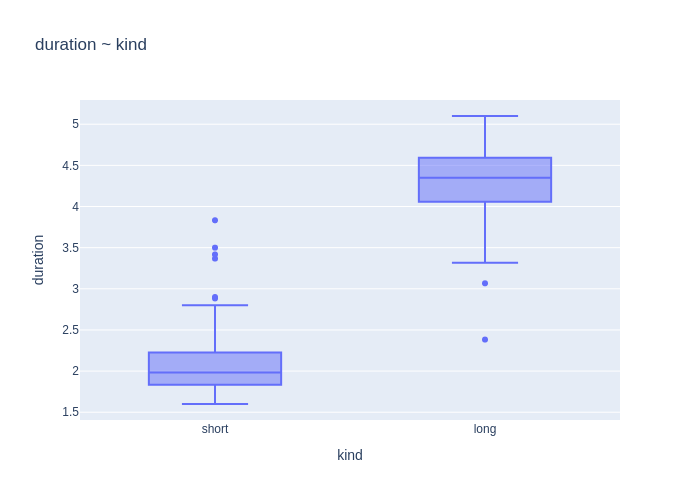

In [15]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


Explanation of Differences Between Models:


**Previous three specifications:**
- `smf.ols('duration ~ waiting', data=old_faithful)`
- `smf.ols('duration ~ waiting', data=old_faithful[short_wait])`
- `smf.ols('duration ~ waiting', data=old_faithful[long_wait])`

The difference between the first three specifications and the new specification is that the new one has a new variable the "kind". Due to the addition of the categorical data in the specification, the specification is no longer comparing linear regression but the comparison of the mean of the duration of the two waiting categories.  


**Evidence against null hypothesis**:

- Null hypothesis: no difference between groups. 
Since the p value is less then 0.001, there is significant evidence against the null hypothesis. Thus, we have strong evidence against the null hypothesis and can reject it.


# chat log:
Here's a summary of our discussion:

You asked about comparing the model specification `smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful)` to three other models: 

1. **Model 1**: `smf.ols('duration ~ waiting', data=old_faithful)`—a simple linear regression using `waiting` as a continuous predictor for the entire dataset.
2. **Model 2**: `smf.ols('duration ~ waiting', data=old_faithful[short_wait])`—a linear regression applied to only "short" wait times (`waiting < 68`).
3. **Model 3**: `smf.ols('duration ~ waiting', data=old_faithful[long_wait])`—a linear regression applied to only "long" wait times (`waiting >= 68`).

We discussed the **big picture differences** between these models and the indicator variable model (`Model 4`) in terms of assumptions, hypothesis testing, and interpretation:

- **Model 1** assumes a linear relationship between `waiting` and `duration` across the entire dataset, without considering the wait time categories.
- **Models 2 and 3** focus on "short" and "long" wait times separately, allowing for the possibility that the relationship between `waiting` and `duration` might differ between these groups.
- **Model 4** uses a categorical variable (`kind`) to compare the **mean durations** between "short" and "long" waits, without assuming a linear relationship. It focuses on group-level differences rather than relationships between variables.

We also touched on the key differences:
- **Models 2 and 3** are more granular, focusing on specific groups.
- **Model 4** directly compares the means between two groups ("short" and "long") and does not assume a linear relationship.
https://chatgpt.com/share/672d618e-fa1c-8002-b8ba-6b7ece2e2c67

## Question 12:
The histogram that shows a bell-shaped, symmetric distribution supports the assumption that the error terms are normally distributed. In contrast, histograms that are skewed, bimodal, or have heavy tails suggest violations of the normality assumption. These deviations require further model investigation, such as transforming variables or reconsidering model assumptions.



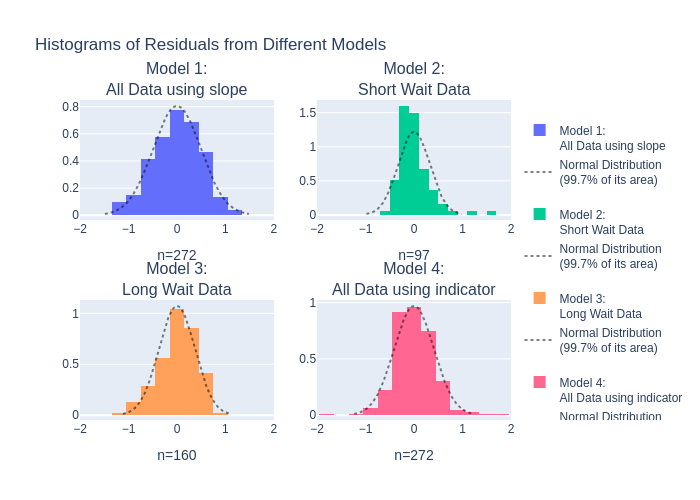

In [16]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer = "png")

## Question 13:


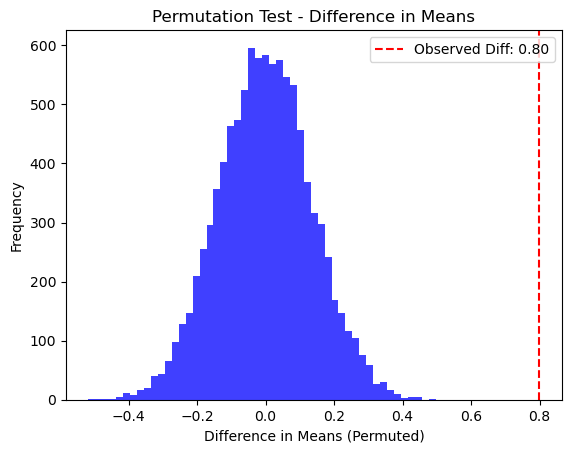

P-value from permutation test: 0.0000


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Example data for "short" and "long" wait times (replace these with your actual data)
short_wait_times = np.random.normal(loc=5, scale=1, size=100)  # Example data for short wait times
long_wait_times = np.random.normal(loc=6, scale=1, size=100)   # Example data for long wait times

# Observed difference in means
observed_diff = np.mean(long_wait_times) - np.mean(short_wait_times)

# Combine the two groups into one dataset
combined = np.concatenate([short_wait_times, long_wait_times])

# Number of permutations
n_permutations = 10000
permuted_diffs = []

# Permutation test: shuffle the labels and compute the difference in means
for _ in range(n_permutations):
    np.random.shuffle(combined)
    perm_short = combined[:len(short_wait_times)]
    perm_long = combined[len(short_wait_times):]
    perm_diff = np.mean(perm_long) - np.mean(perm_short)
    permuted_diffs.append(perm_diff)

# Calculate p-value (proportion of permuted differences greater than or equal to the observed difference)
permuted_diffs = np.array(permuted_diffs)
p_value = np.mean(np.abs(permuted_diffs) >= np.abs(observed_diff))

# Plot the distribution of permuted differences
plt.hist(permuted_diffs, bins=50, alpha=0.75, color='blue')
plt.axvline(observed_diff, color='red', linestyle='--', label=f'Observed Diff: {observed_diff:.2f}')
plt.xlabel('Difference in Means (Permuted)')
plt.ylabel('Frequency')
plt.title('Permutation Test - Difference in Means')
plt.legend()
plt.show()

# Output the p-value
print(f"P-value from permutation test: {p_value:.4f}")


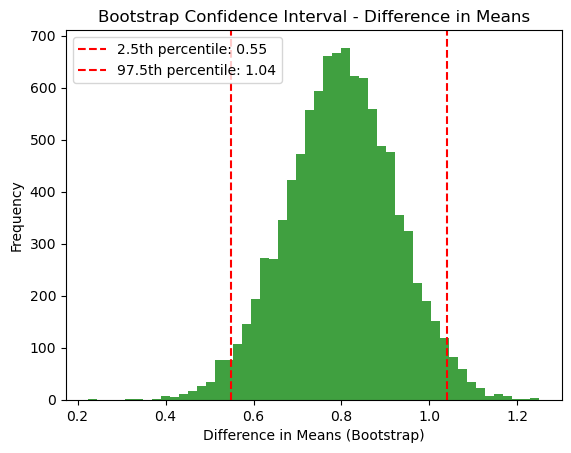

95% Bootstrap Confidence Interval for the Difference in Means: (0.55, 1.04)


In [18]:
# Number of bootstrap samples
n_bootstrap = 10000
bootstrapped_diffs = []

# Bootstrap resampling
for _ in range(n_bootstrap):
    # Resample with replacement from each group
    bootstrap_short = np.random.choice(short_wait_times, size=len(short_wait_times), replace=True)
    bootstrap_long = np.random.choice(long_wait_times, size=len(long_wait_times), replace=True)
    
    # Compute the difference in means for each bootstrap sample
    boot_diff = np.mean(bootstrap_long) - np.mean(bootstrap_short)
    bootstrapped_diffs.append(boot_diff)

# Convert the list of differences to a numpy array
bootstrapped_diffs = np.array(bootstrapped_diffs)

# Calculate the 95% bootstrap confidence interval
lower_bound = np.quantile(bootstrapped_diffs, 0.025)
upper_bound = np.quantile(bootstrapped_diffs, 0.975)

# Plot the bootstrap distribution
plt.hist(bootstrapped_diffs, bins=50, alpha=0.75, color='green')
plt.axvline(lower_bound, color='red', linestyle='--', label=f'2.5th percentile: {lower_bound:.2f}')
plt.axvline(upper_bound, color='red', linestyle='--', label=f'97.5th percentile: {upper_bound:.2f}')
plt.xlabel('Difference in Means (Bootstrap)')
plt.ylabel('Frequency')
plt.title('Bootstrap Confidence Interval - Difference in Means')
plt.legend()
plt.show()

# Output the 95% confidence interval
print(f"95% Bootstrap Confidence Interval for the Difference in Means: ({lower_bound:.2f}, {upper_bound:.2f})")


Comparison with the Indicator Variable-Based Model Approach
The indicator variable-based model (typically using a regression model like ols) is a parametric method that models the data directly and uses assumptions about the underlying distribution. Here's how it compares to the permutation and bootstrap methods:

Similarity:
All methods (permutation test, bootstrap, and the indicator variable model) aim to compare the difference in means between two groups.
In the case of the indicator variable model, you would use an indicator variable (such as C(group) in a regression model) to separate the two groups and test for significant differences.
Differences:
Assumptions:
The indicator variable model typically assumes normality (or at least approximate normality) of the residuals and equal variance (homoscedasticity). These assumptions might not hold in all datasets.
The permutation and bootstrap methods are distribution-free; they do not rely on these assumptions and are more flexible in dealing with non-normal or heteroscedastic data.
Output:
The indicator variable model provides a direct estimate of the difference between the group means (via coefficients) and uses statistical tests (e.g., t-tests) to infer significance.
The permutation test and bootstrap methods provide empirical estimates of significance (p-value for the permutation test) and confidence intervals (for the bootstrap), based on resampling methods.
Conclusion:

The indicator variable model is parametric and assumes certain properties of the data, while the permutation and bootstrap methods are non-parametric and make fewer assumptions about the underlying data distribution.

## Question 14:
Yes. 

# Chat log;
### Summary:

#### **(A) Permutation Test**
- **Purpose**: The permutation test evaluates if the observed difference between two groups (short vs. long wait times) is likely to have occurred under the null hypothesis, assuming no real difference between the groups.
- **Approach**:
  1. Combine the two groups into one dataset.
  2. Shuffle the labels (i.e., which group is "short" and which is "long") many times.
  3. For each shuffle, compute the difference in means between the two new groups.
  4. Compare the observed difference to the distribution of permuted differences to compute the **p-value**.
- **Key Advantage**: No assumptions about the data’s underlying distribution are needed.
- **Code**: The test shuffles the group labels 10,000 times and calculates the p-value based on how many permuted differences are as extreme as or more extreme than the observed difference.

#### **(B) Bootstrap Confidence Interval**
- **Purpose**: The bootstrap method creates a confidence interval for the difference in means between two groups by resampling the data.
- **Approach**:
  1. Resample with replacement from each group to create many bootstrap samples.
  2. For each resample, compute the difference in means.
  3. Use the 2.5th and 97.5th percentiles of the bootstrap differences to form a **95% confidence interval**.
- **Key Advantage**: It allows estimation of confidence intervals without making strong assumptions about the data’s distribution.
- **Code**: The method repeats the resampling 10,000 times to build a distribution of mean differences and calculates the 95% confidence interval.

#### **Comparison with the Indicator Variable-Based Model**
- **Indicator Variable Model**: A parametric approach (e.g., using `ols` regression) assumes normality of the residuals and homoscedasticity (equal variance). It provides estimates of differences in means via regression coefficients and tests significance.
- **Permutation and Bootstrap Methods**:
  - **Non-parametric**: These methods do not rely on the assumption of normality or equal variance.
  - **Empirical Significance**: The permutation test provides a p-value, while the bootstrap method provides a confidence interval.
  
#### **Key Differences**:
1. **Assumptions**: The indicator model assumes a normal distribution (or similar), while permutation and bootstrap methods do not require this assumption.
2. **Output**: The indicator model gives a direct estimate and test for significance (e.g., t-tests), while the permutation and bootstrap methods offer empirical results (p-value and confidence intervals, respectively).
3. **Flexibility**: The permutation and bootstrap methods are more flexible in handling data with non-normal distributions or unequal variances.

#### **Conclusion**:
- **Permutation and bootstrap methods** are robust and distribution-free, making them particularly useful when the assumptions of parametric tests (like the indicator model) do not hold.
- The **indicator variable model** is simpler and provides direct estimates, but it may not be as reliable if the data violate key assumptions.

https://chatgpt.com/share/672d7bf4-9a5c-8002-b639-7d5406152ca3